##### Copyright 2024 Google LLC.

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
!pip install numpy matplotlib sckit umap umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


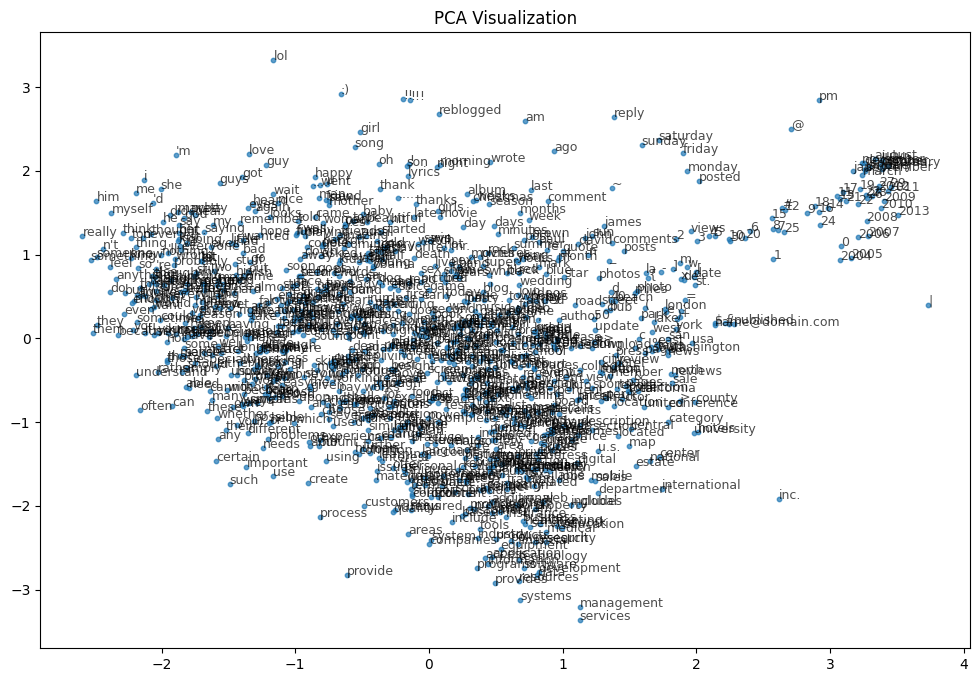

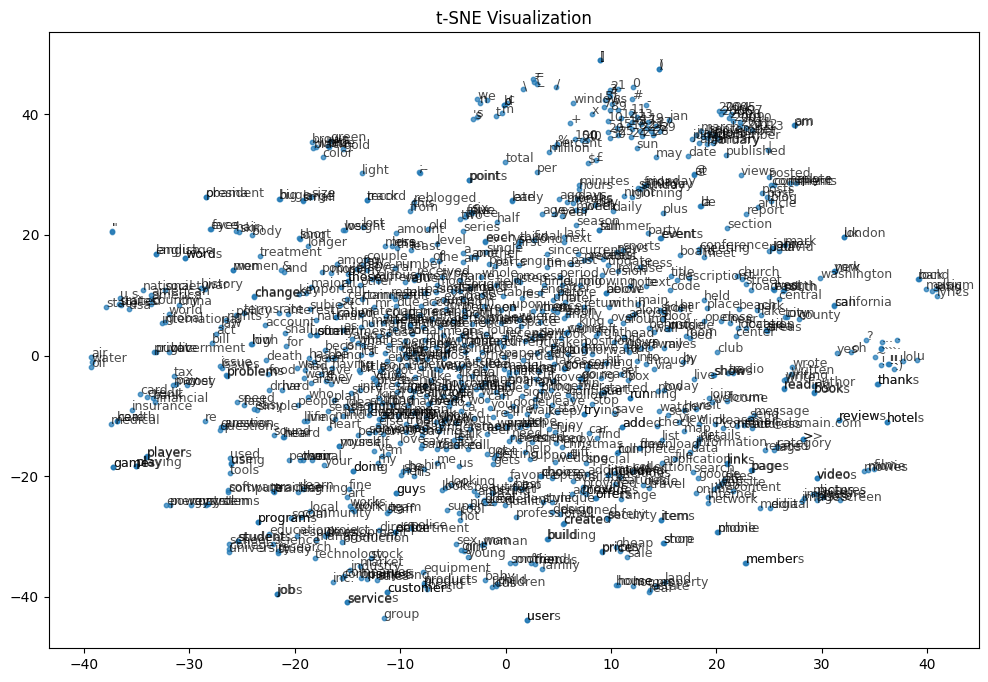

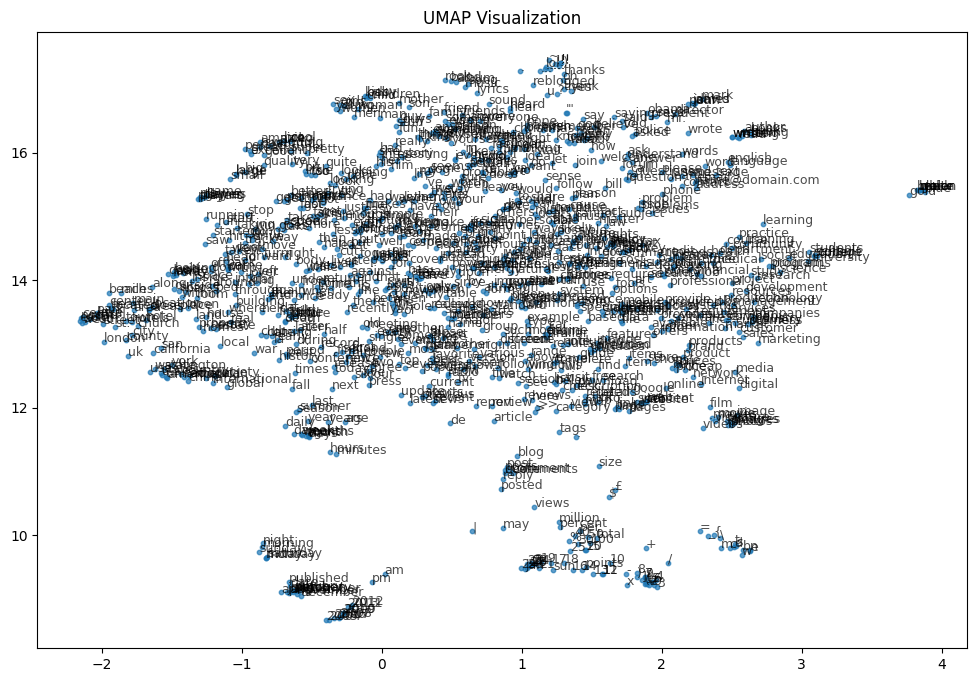

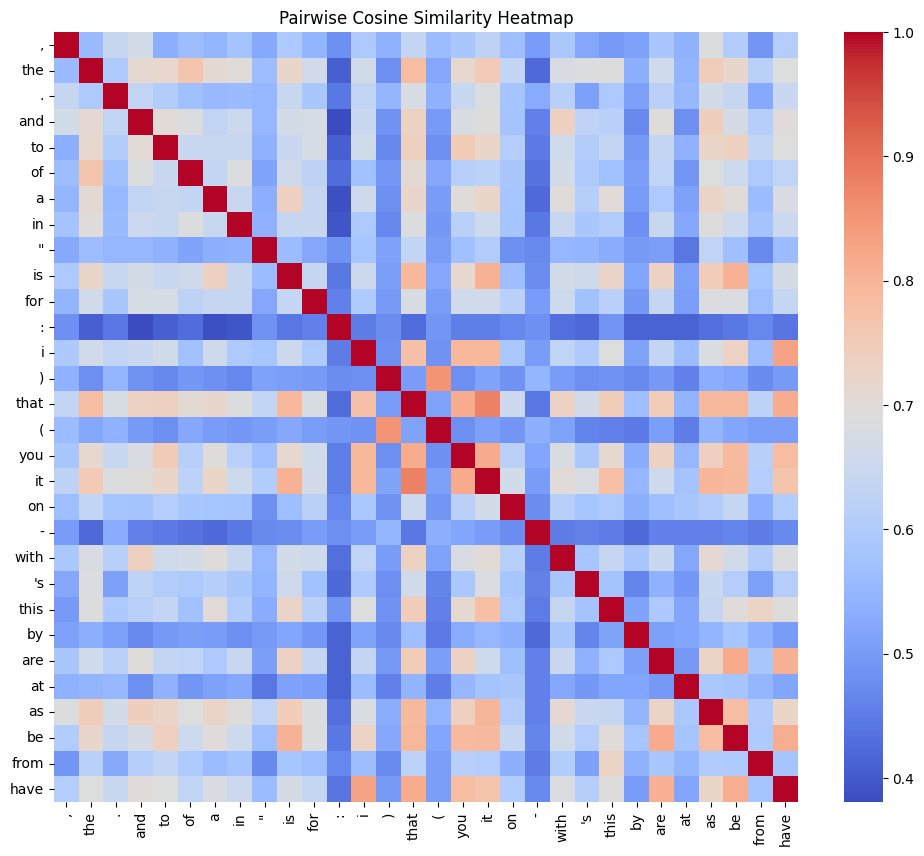

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
def load_glove_embeddings(file_path, num_embeddings=1000):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= num_embeddings:
                break
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings
file_path = "/content/drive/MyDrive/glove42B300d.txt"
embeddings = load_glove_embeddings(file_path)
words = list(embeddings.keys())
vectors = np.array(list(embeddings.values()))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)


tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(vectors)


umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(vectors)
def plot_scatter(data, title, words):
    plt.figure(figsize=(12, 8))
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.7)
    for i, word in enumerate(words):
        plt.text(data[i, 0], data[i, 1], word, fontsize=9, alpha=0.7)
    plt.title(title)
    plt.show()

plot_scatter(pca_result, "PCA Visualization", words)
plot_scatter(tsne_result, "t-SNE Visualization", words)
plot_scatter(umap_result, "UMAP Visualization", words)
def plot_similarity_heatmap(vectors, words):
    similarity_matrix = 1 - squareform(pdist(vectors, metric='cosine'))
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, cmap="coolwarm")
    plt.title("Pairwise Cosine Similarity Heatmap")
    plt.show()

plot_similarity_heatmap(vectors[:30], words[:30])

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API Python quickstart

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/tutorials/quickstart_colab"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This tutorial shows you how to get started with the Gemini API using the Python SDK.

## Prerequisites

You can run this tutorial in Google Colab, which doesn't require additional environment configuration.

Alternatively, to complete this quickstart locally, see the Python guidance in [Get started with the Gemini API](https://ai.google.dev/tutorials/quickstart).

## Install the SDK

The Python SDK for the Gemini API is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 1.1 MB/s eta 0:00:00


## Set up your API key

To use the Gemini API, you'll need an API key. If you don't already have one, create a key in Google AI Studio.

<a class="button" href="https://aistudio.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`. Then pass the key to the SDK:

In [ ]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Initialize the Generative Model

Before you can make any API calls, you need to initialize the Generative Model.

In [ ]:
model = genai.GenerativeModel('gemini-pro')

## Generate text

In [ ]:
response = model.generate_content("Write a story about a magic backpack.")
print(response.text)

In the bustling city of Evermore, there lived an ordinary schoolgirl named Anya. Little did she know that her life was about to take an extraordinary turn when she discovered a peculiar backpack.

One morning, as Anya rummaged through her grandmother's attic, her eyes fell upon a dusty old backpack. Intrigued, she picked it up and unzipped it. Inside, she found a jumble of papers, trinkets, and a small, glowing crystal.

As Anya reached out to touch the crystal, the backpack hummed with a soft energy. Suddenly, strange things began to happen. The zippers moved on their own, opening and closing compartments that revealed hidden pockets. Book pages turned themselves, revealing forgotten spells and incantations.

Anya realized that this was no ordinary backpack. It was a magical backpack, imbued with ancient enchantments. Excited and overwhelmed, she carefully put on the backpack and felt its power surge through her.

The next day at school, Anya couldn't resist testing out her new secret

## What's next

To learn more about working with the Gemini API, see the [Python tutorial](https://ai.google.dev/tutorials/python_quickstart).

If you're new to generative AI models, you might want to look at the
[concepts guide](https://ai.google.dev/docs/concepts) and the
[Gemini API overview](https://ai.google.dev/docs/gemini_api_overview).